In [1]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Cómo aplicar Python a la manipulación y análisis de datos crudos.

## Clase 5: Los do's and don'ts de la extraccion de datos

### Cargue de Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Extraccion y Lectura del Dataset



In [3]:
file_path = '/content/gdrive/MyDrive/Crehana/Curso/datasets/imports-85.data'
#file_path = r'G:\Mi unidad\Crehana\Curso\datasets\imports-85.data'
#file_path = "../datasets/imports-85.data"

In [4]:
df = pd.read_table(file_path)
df.head()

,"3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495"
0,"3,?,alfa-romero,gas,std,two,convertible,rwd,fr..."
1,"1,?,alfa-romero,gas,std,two,hatchback,rwd,fron..."
2,"2,164,audi,gas,std,four,sedan,fwd,front,99.80,..."
3,"2,164,audi,gas,std,four,sedan,4wd,front,99.40,..."
4,"2,?,audi,gas,std,two,sedan,fwd,front,99.80,177..."


In [5]:
df = pd.read_table(file_path, delimiter=",")
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


## Clase 6: Hacks para limpiar los datos:

In [6]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [7]:
df = pd.read_table(file_path, delimiter=",", names = headers) 
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## Tratamiento de Datos Nulos

In [8]:
df.replace("?", np.nan, inplace = True) # Reemplazamos los valores "?" por "NaN" values
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


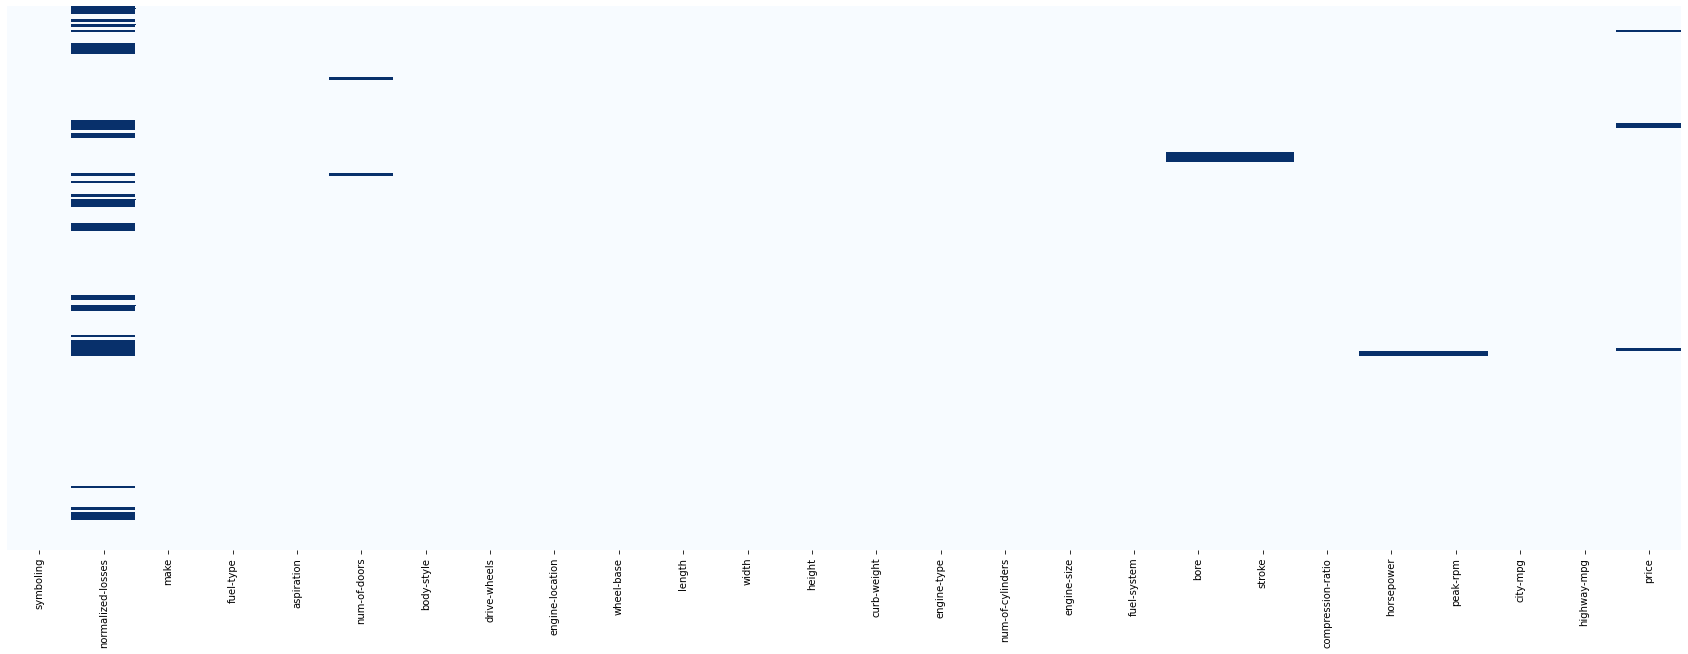

In [9]:
plt.figure(figsize=[30,10])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")
sns.set(font_scale=1)
plt.show()
plt.close()

In [10]:
df.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Clase 7: Manejo de Valores Faltantes y formato de variables

### Remplazar con la Media


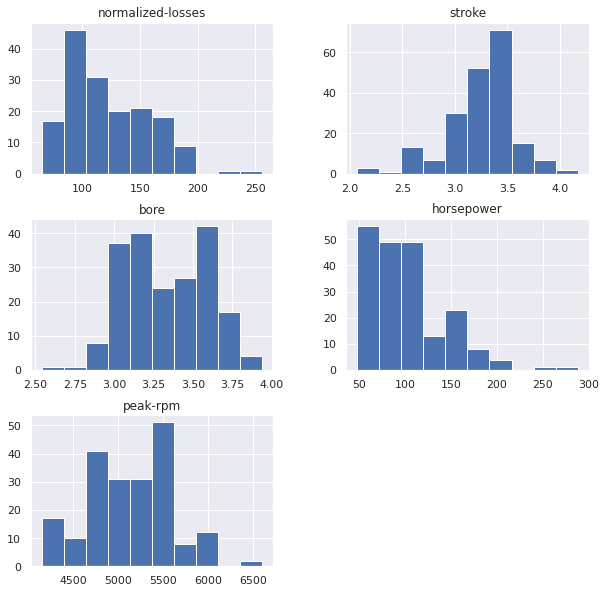

In [12]:
df[["normalized-losses","stroke","bore","horsepower","peak-rpm"]].astype('float').hist(figsize=(10,10), color = 'b')
plt.show()
plt.close()

In [13]:
df["normalized-losses"].replace(np.nan, df["normalized-losses"].astype("float").mean(), inplace=True)
df["stroke"].replace(np.nan, df["stroke"].astype("float").mean(), inplace=True)
df["bore"].replace(np.nan, df["bore"].astype("float").mean(), inplace=True)
df["horsepower"].replace(np.nan, df["horsepower"].astype("float").mean(), inplace=True)
df["peak-rpm"].replace(np.nan, df["peak-rpm"].astype("float").mean(), inplace=True)

### Remplazar con la Frecuencia


In [14]:
plt.figure(figsize=[10,5])
sns.histplot(df["num-of-doors"],stat="probability")
sns.set(font_scale=1.5)
plt.close()

In [15]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)

### Eliminar toda la fila

In [16]:
# elimina toda la fila con NaN en la columna "price"
df.dropna(subset=["price"], axis=0, inplace=True)

In [17]:
df.reset_index(drop = True, inplace=True) # reiniciamos indices

plt.figure(figsize=[20,10])
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = "Blues")
sns.set(font_scale=1)
plt.close()

In [18]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [19]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [20]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Clase 8: Proyecto parte 1: Extraccion y limpieza de datos

# Analisis Exploratorio de Datos y Estadisticos basicos

## Clase 10: Estandarizacion, Normalizacion y Agrupacion de los datos

### Estandarizacion



In [21]:
# Convertir las columnas m.p.g. a L/100km mediante una operación matematica (235 dividido por m.p.g.)
df['city-L/100km'] = 235/df["city-mpg"] # Creamos una columna en nuestro dataset
df["highway-L/100km"] = 235/df["highway-mpg"] # Creamos una columna en nuestro dataset

# revisar los datos transformados
df[["city-mpg","city-L/100km","highway-mpg","highway-L/100km"]].head()

,city-mpg,city-L/100km,highway-mpg,highway-L/100km
0,21,11.190476,27,8.703704
1,21,11.190476,27,8.703704
2,19,12.368421,26,9.038462
3,24,9.791667,30,7.833333
4,18,13.055556,22,10.681818


### Normalizacion



In [22]:
# Tomamos las columnas que queremos normalizar
df[["length","width","height"]].head()

,length,width,height
0,168.8,64.1,48.8
1,168.8,64.1,48.8
2,171.2,65.5,52.4
3,176.6,66.2,54.3
4,176.6,66.4,54.3


In [23]:
# intercambia (valor original) por (valor original)/(valor máximo)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['width']/df['width'].max()
# Visualizamos nuevamente las columnas, que ya estan normalizadas
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.890278
1,0.811148,0.890278,0.890278
2,0.822681,0.909722,0.909722
3,0.848630,0.919444,0.919444
4,0.848630,0.922222,0.922222


### Discretización



In [24]:
df["horsepower"]=df["horsepower"].astype(int, copy=True) # Corregimos el tipo de dato a entero (con el metodo astype que ya vimos)

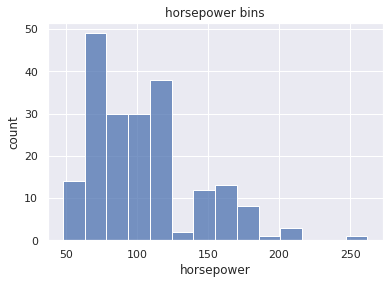

In [25]:
# establece las etiquetas x/y y muestra el título 
sns.histplot(data=df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

In [26]:
bins = np.linspace(min(df["horsepower"]), # Valor minimo de la columna
                   max(df["horsepower"]), # Valor maximo
                   4 # Como se necesitan 3 contenedores, deben haber 4 divisiones
                   )
bins # Mostramos los contenedores (lo muestra como un metodo array)

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [27]:
group_names = ['Bajo', 'Medio', 'Alto'] # Etiquetas de rangos

In [28]:
df['horsepower-binned'] = pd.cut(df['horsepower'],  # Tomamos la columna
                                 bins, # Con estos contenedores encontrados
                                 labels=group_names, # Le aplicamos esta etiqueta de acuerdo al contendedor
                                 include_lowest=True ) # Si el primer intervalo lo debemos incluir, en este caso le damos true

df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


In [29]:
df["horsepower-binned"].value_counts()

Bajo     153
Medio     43
Alto       5
Name: horsepower-binned, dtype: int64

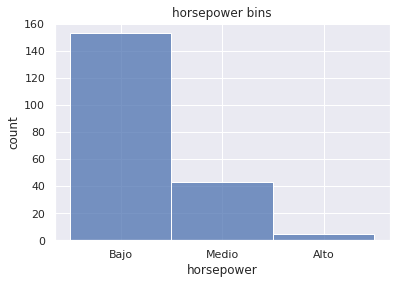

In [30]:
sns.histplot(data=df["horsepower-binned"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

### Visualización de Contenedores

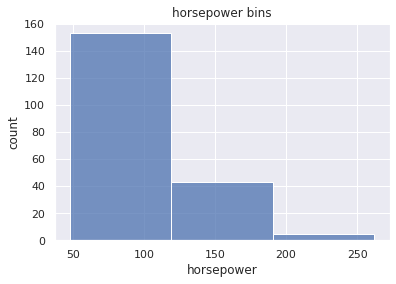

In [31]:
sns.histplot(data=df["horsepower"], bins = 3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
sns.set(font_scale=1)
plt.show()
plt.close()

### Dummy Variable


In [32]:
df["fuel-type"].value_counts() # Contamos dentro de la variable "fuel-type" cuantos tienen gas o diesel

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [33]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'diesel':'fuel-type-diesel', 'gas': 'fuel-type-gas'}, inplace=True) # Es buena idea realizar este renombramiento de variables
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
# combinar el dataframe "df" y "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)
# eliminar la columna original "fuel-type" de "df" 
df.drop("fuel-type", axis = 1, inplace=True)

In [35]:
df.head() # Ver el final del dataset

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Bajo,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Bajo,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.909722,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medio,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.919444,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Bajo,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.922222,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Bajo,0,1


In [36]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,Bajo,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.890278,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,Bajo,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.909722,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,Medio,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.919444,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,Bajo,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.922222,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,Bajo,0,1,1,0



## Clase 11: Descripcion estadisticas del dataset

In [37]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.915126,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.029187,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.837500,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.890278,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.909722,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.925000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [38]:
df["price"].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

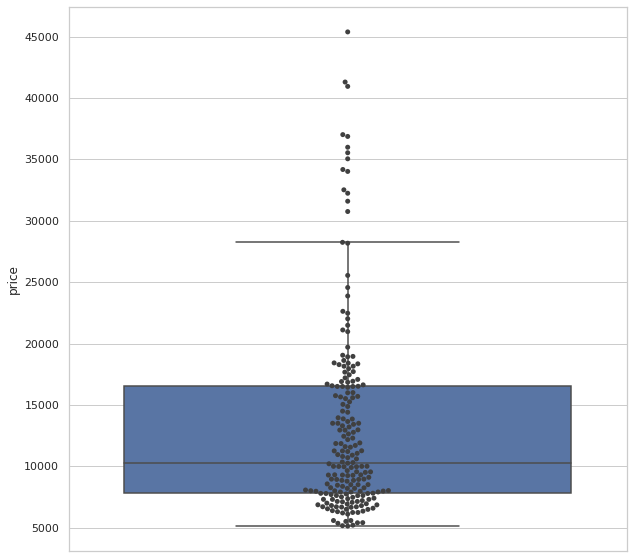

In [39]:
plt.figure(figsize=[10,10])
sns.set(style="whitegrid")
ax = sns.boxplot(y="price", data=df, showfliers = False)
ax = sns.swarmplot(y="price", data=df, color=".25")
plt.show()
plt.close()

In [40]:
# Describe para variables que no son numeros
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


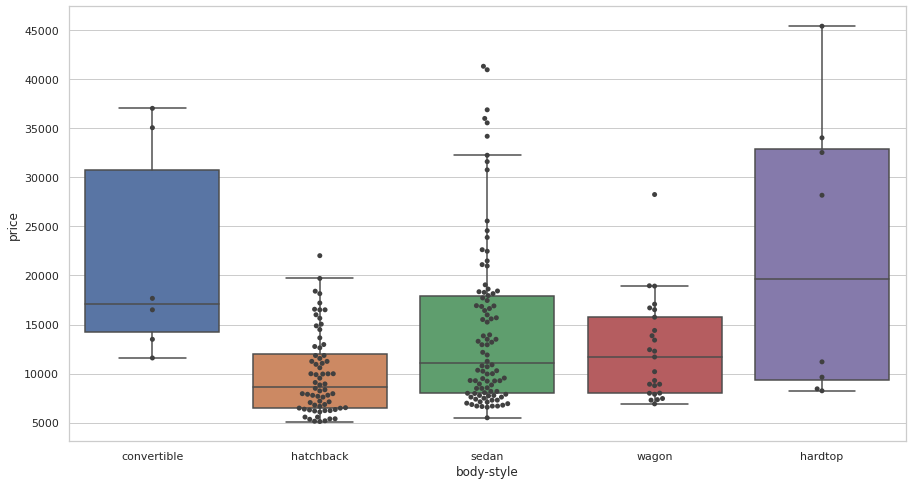

In [41]:
plt.figure(figsize=[15,8])
sns.set(style="whitegrid")

ax = sns.boxplot(x="body-style", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="body-style", y="price", data=df, color=".25")
plt.show()
plt.close()

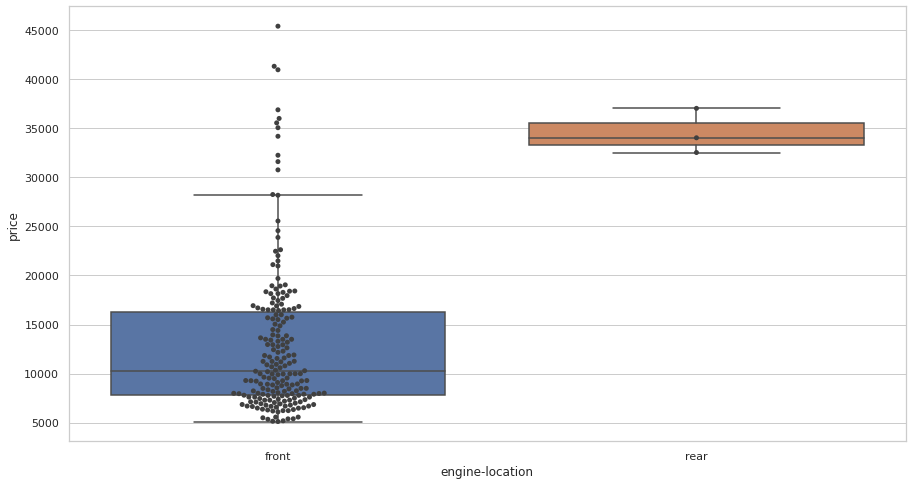

In [42]:
plt.figure(figsize=[15,8])
sns.set(style="whitegrid")
ax = sns.boxplot(x="engine-location", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="engine-location", y="price", data=df, color=".25")
plt.show()
plt.close()

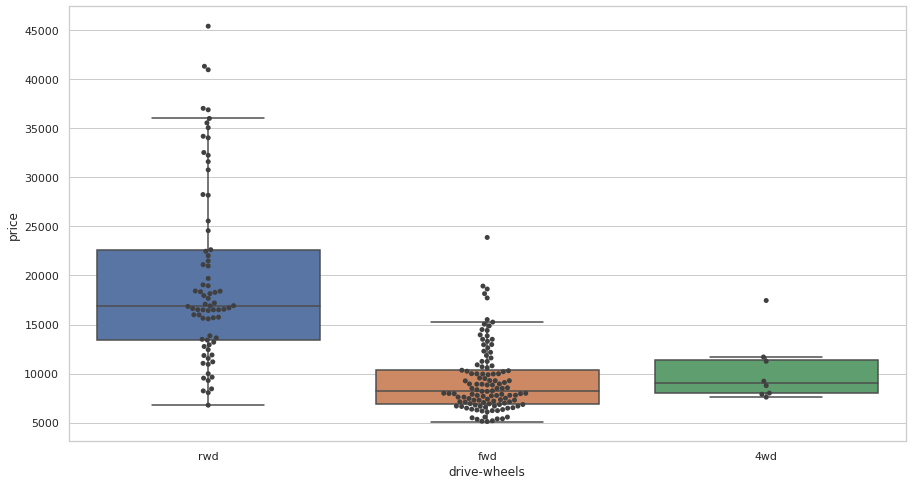

In [43]:
# drive-wheels

plt.figure(figsize=[15,8])
sns.set(style="whitegrid")
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")
plt.show()
plt.close()

## Clase 12: Relacion Lineal y Correlacion de datos

In [44]:
correlations = df.corr() # Creamos una dataset con el metodo pd.corr() el cual mostrara las correlaciones entre variables
correlations

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.242423,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,0.086802,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.814507,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.857170,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.242423,0.086802,0.814507,0.857170,1.000000,1.000000,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.866201,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.729436,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.544885,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,0.188822,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


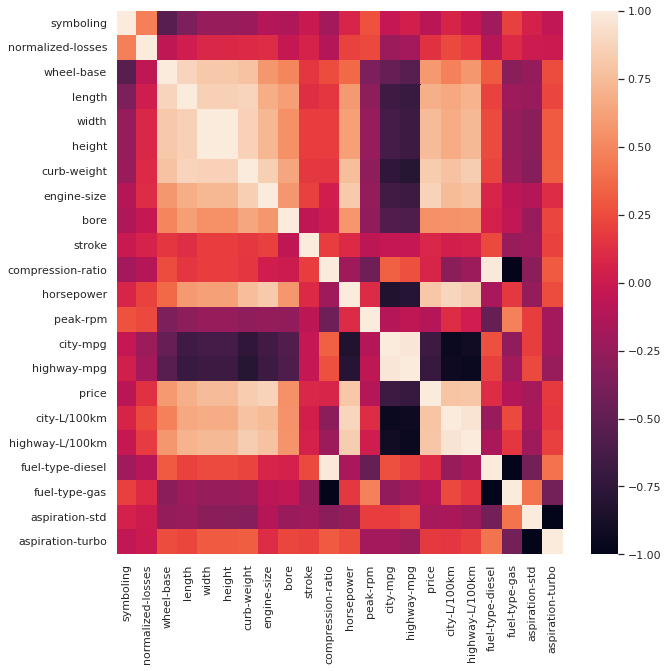

In [45]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot=False)
sns.set(font_scale=1)
plt.show()
plt.close()

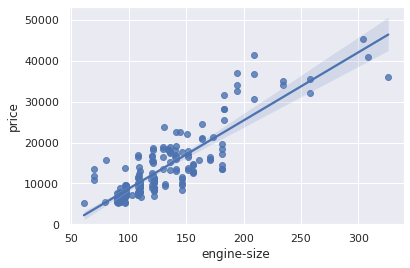

In [46]:
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
plt.show()
plt.close()

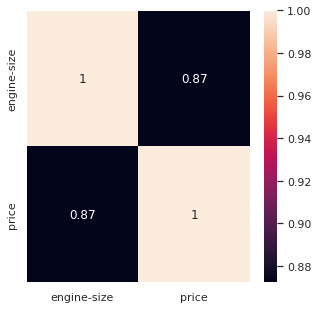

In [47]:
correlation = df[["engine-size", "price"]].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

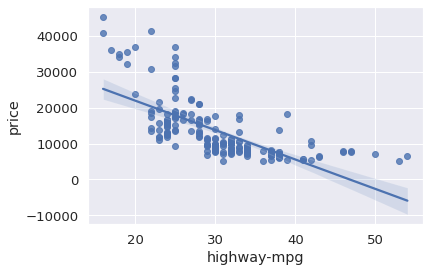

In [48]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()
plt.close()

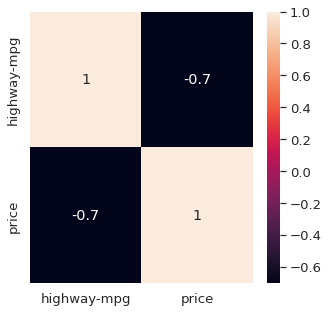

In [49]:
correlation = df[['highway-mpg', 'price']].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

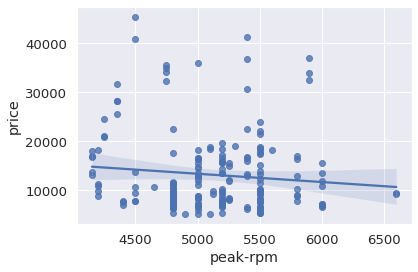

In [50]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()
plt.close()

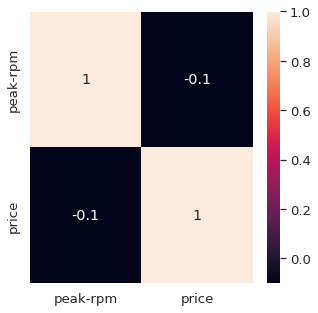

In [51]:
correlation = df[['peak-rpm','price']].corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlation, annot=True)
sns.set(font_scale=1.2)
plt.show()
plt.close()

## Clase 13: Proyecto parte 2: Analisis Exploratorio de Datos




# Métodos de ML básicos con Python

## Clase 15: Aplicando Modelos Basicos de Aprendizaje Supervisado: Regresion Lineal Simple

In [52]:
from sklearn.linear_model import LinearRegression # importamos LinearRegression de la libreria sklearn, clase linear_model
from sklearn.model_selection import train_test_split # Dividimos nuestro dataset en entrenamiento y testing

In [53]:
# Definimos las variables independientes y objetivo
X = df[['engine-size']] 
Y = df['price'].values

In [54]:
# dividimos nuestro dataset en entrenamiento y testing, con una proporcion de 80%/20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [55]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

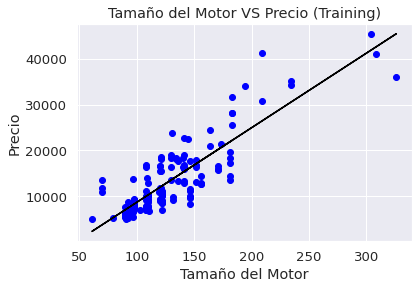

In [56]:
#Realizamos la visualizacion del set de entrenamiento

regressor_train = plt
regressor_train.scatter(X_train, Y_train, color = 'blue')
regressor_train.plot(X_train, regressor.predict(X_train), color = 'black')
regressor_train.title('Tamaño del Motor VS Precio (Training)')
regressor_train.xlabel('Tamaño del Motor')
regressor_train.ylabel('Precio')
regressor_train.show()
regressor_train.close()

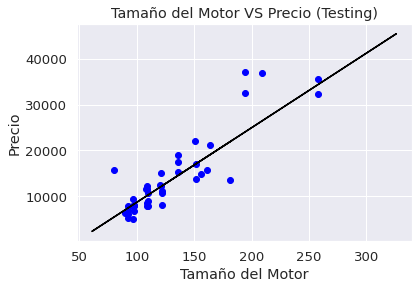

In [57]:
#Realizamos la visualizacion del set de testing

regressor_test = plt
regressor_test.scatter(X_test, Y_test, color = 'blue')
regressor_test.plot(X_train, regressor.predict(X_train), color = 'black')
regressor_test.title('Tamaño del Motor VS Precio (Testing)')
regressor_test.xlabel('Tamaño del Motor')
regressor_test.ylabel('Precio')
regressor_test.show()
regressor_test.close()

In [58]:
# Exportamos de nuestro modelo el intercepto y el coeficiente o la pendiente
print("Intercepto: {}, Coeficiente: {}".format(regressor.intercept_, regressor.coef_))

Intercepto: -7513.950427481541, Coeficiente: [162.32926503]


Nuestra funcion es la siguiente

$$
price = -7513.95 + 162.32 *  engine-size
$$

In [59]:
regressor.score(X_test, Y_test)

0.7775197477684599

## Clase 16: Aplicando el Modelo de Regresion Lineal Multiple

In [60]:
# Definimos las variables independientes y objetivo
X = df[['horsepower', 'curb-weight', 'engine-size','length','width']]
Y = df['price'].values

In [61]:
# dividimos nuestro dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [62]:
# Invocamos el modelo y creamos el modelo con .fit
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

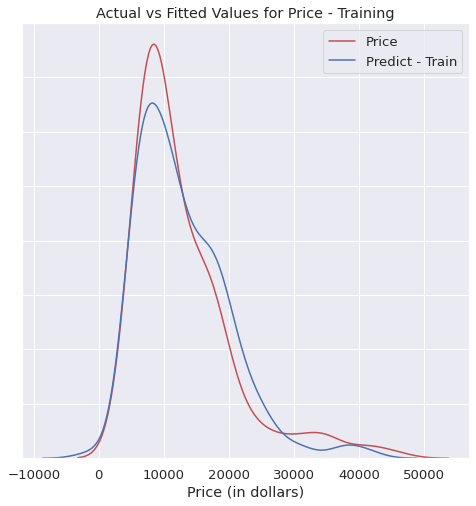

In [63]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_train, hist=False, color="r")
sns.distplot(regressor.predict(X_train), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Train'])

plt.title('Actual vs Fitted Values for Price - Training')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Train'])

plt.show()
plt.close()

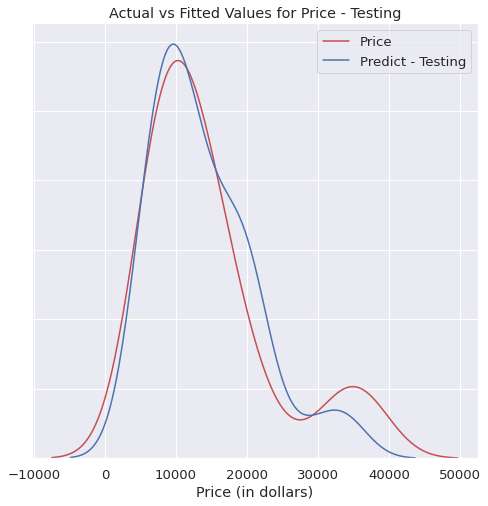

In [64]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_test, hist=False, color="r")
sns.distplot(regressor.predict(X_test), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

In [65]:
regressor.score(X_test, Y_test)

0.77722326394185

In [66]:
regressor.intercept_

-50408.50830055337

In [67]:
regressor.coef_

array([ 2.56362588e+01,  3.97492628e+00,  7.90153696e+01, -1.93251317e+03,
        4.62191537e+04])

La funcion es: 

$$
Price = -50408.50 + 25.6*horsepower + 3.97*curb-weight + 79.01*engine-size - 193.25*length + 4621.1*width
$$


## Clase 17: Aplicando el Modelo de Bosques Aleatorios



In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
# Definimos las variables independientes y objetivo
X = df[['horsepower', 'curb-weight', 'engine-size','highway-L/100km','city-L/100km']]
Y = df['price']

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [71]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

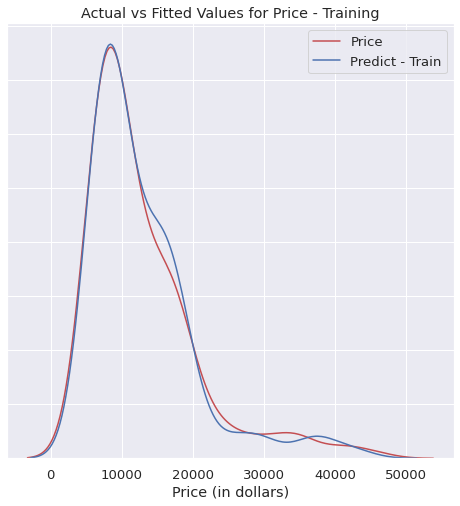

In [72]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_train, hist=False, color="r")
sns.distplot(forest.predict(X_train), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Train'])

plt.title('Actual vs Fitted Values for Price - Training')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Train'])

plt.show()
plt.close()

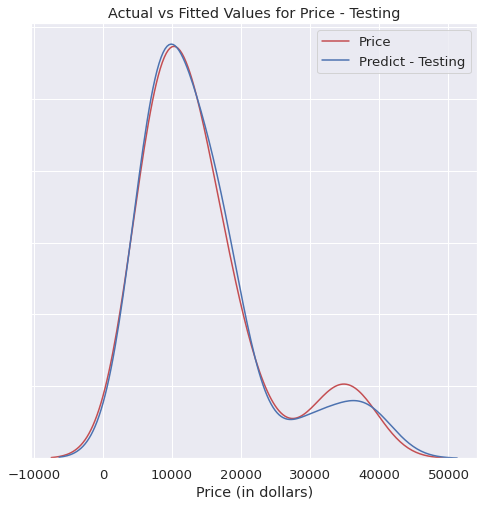

In [73]:
# Realizamos la validacion con el set de entrenamiento. No se puede visualizar una recta ya que ahora contamos con mas de 1 variable independiente
# Vamos a dibujar una distribucion 

fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(Y_test, hist=False, color="r")
sns.distplot(forest.predict(X_test), hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

In [74]:
forest.score(X_test, Y_test)

0.9183007056570305

# Visualización de resultados efectiva.



## Clase 19: Visualizacion Efectiva con Python

In [75]:
df[['horsepower','horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111,Bajo
1,111,Bajo
2,154,Medio
3,102,Bajo
4,115,Bajo
5,110,Bajo
6,110,Bajo
7,110,Bajo
8,140,Medio
9,101,Bajo


In [76]:
df[['horsepower','horsepower-binned']].groupby("horsepower-binned").count()

,horsepower
horsepower-binned,
Bajo,153
Medio,43
Alto,5


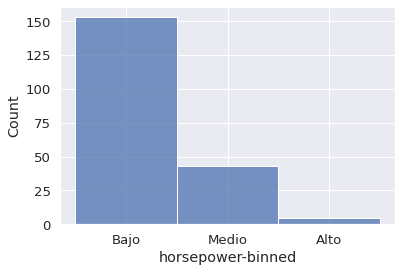

In [77]:
sns.histplot(data=df["horsepower-binned"]) # Creeamos el grafico
plt.show()
plt.close()

In [78]:
df[["normalized-losses"]].describe()

,normalized-losses
count,201.00000
mean,122.00000
std,31.99625
min,65.00000
25%,101.00000
50%,122.00000
75%,137.00000
max,256.00000


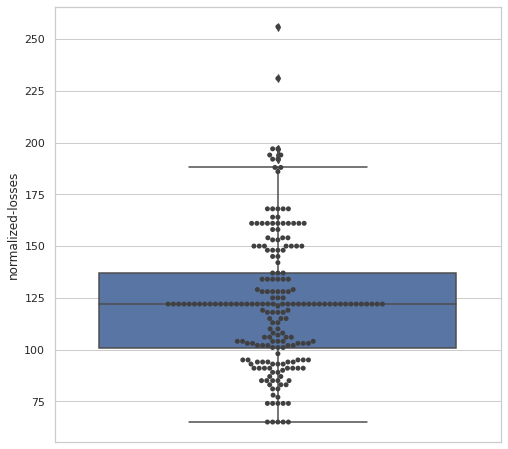

In [79]:
plt.figure(figsize=[8,8])
sns.set(style="whitegrid")
ax = sns.boxplot(y="normalized-losses", data=df, showfliers = True)
ax = sns.swarmplot(y="normalized-losses", data=df, color=".25")
plt.show()
plt.close()

In [80]:
X_test.head()

,horsepower,curb-weight,engine-size,highway-L/100km,city-L/100km
18,70,1874,90,5.465116,6.184211
170,73,2480,110,7.121212,7.833333
107,95,3430,152,9.400000,9.400000
98,152,3095,181,10.681818,13.823529
177,156,3151,161,9.791667,12.368421


In [81]:
X_test.shape

(41, 5)

In [82]:
forest.predict(X_test)

array([ 6078.2       ,  9258.5       , 18302.5       , 14968.2       ,
       16557.5       ,  8227.3       , 13200.4       ,  6509.2       ,
       18132.9       ,  7334.3       ,  9599.8       , 30014.3       ,
        7821.1       ,  7584.3       , 14280.1       , 17731.5       ,
        7019.8       , 16319.6       ,  8443.        ,  6785.2       ,
        8788.5       , 13722.675     , 37210.8       ,  8158.8       ,
       10050.5       , 30014.3       ,  8055.3       , 10215.7       ,
       14899.2       , 37210.8       , 38833.3       , 12475.8       ,
        7851.6       , 18302.5       ,  8259.5       , 10759.4       ,
       16057.        , 15757.6       ,  9006.53333333, 17298.5       ,
        7727.9       ])

In [83]:
len(forest.predict(X_test))

41

In [84]:
df_price = X_test.copy().reset_index(drop=True)
df_price["price"] = Y_test.values
df_price["price_predicted"] = forest.predict(X_test)
df_price

,horsepower,curb-weight,engine-size,highway-L/100km,city-L/100km,price,price_predicted
0,70,1874,90,5.465116,6.184211,6295.0,6078.200000
1,73,2480,110,7.121212,7.833333,10698.0,9258.500000
2,95,3430,152,9.400000,9.400000,13860.0,18302.500000
3,152,3095,181,10.681818,13.823529,13499.0,14968.200000
4,156,3151,161,9.791667,12.368421,15750.0,16557.500000
5,85,2275,109,6.911765,8.703704,8495.0,8227.300000
6,110,2507,136,9.400000,12.368421,15250.0,13200.400000
7,62,1985,92,6.025641,6.714286,5348.0,6509.200000
8,121,2765,164,8.392857,11.190476,21105.0,18132.900000
9,70,2081,98,6.351351,7.833333,6938.0,7334.300000


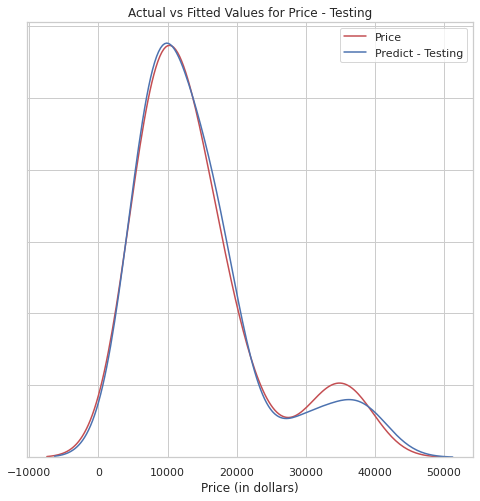

In [85]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Actual vs Fitted Values for Price - Testing')
plt.xlabel('Price (in dollars)')

plt.legend(labels=['Price', 'Predict - Testing'])

plt.show()
plt.close()

## Clase 20: Un Data Scientist vale lo que sus informes


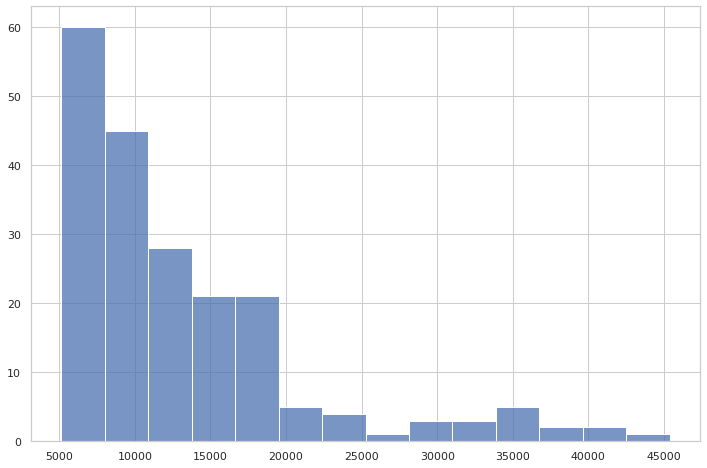

In [86]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.histplot(data=df["price"])
ax.set(ylabel=None)
ax.set(xlabel=None)
plt.show()
plt.close()

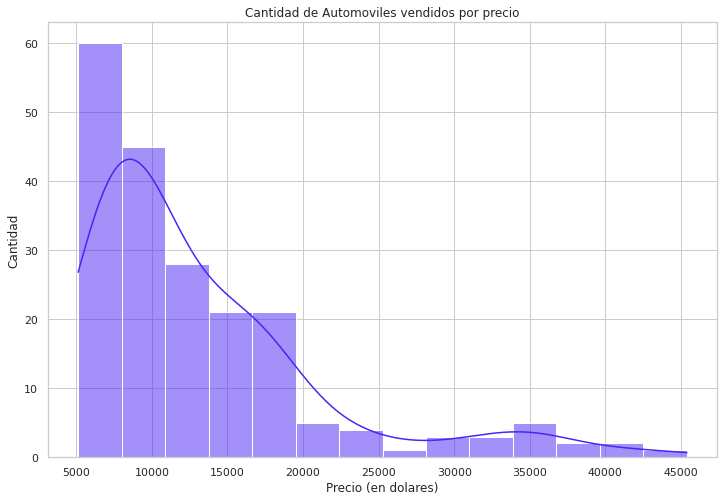

In [87]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 8x8
sns.histplot(df["price"], color='#4B22F4', kde = True) # Tomamos la variable precio, con el color azul de nuestra paleta de colores
plt.xlabel("Precio (en dolares)") # Los ejes siempre es recomendable colocarles titulos
plt.ylabel("Cantidad")
plt.title("Cantidad de Automoviles vendidos por precio") # Un titulo del grafico siempre es importante
plt.show()
plt.close()

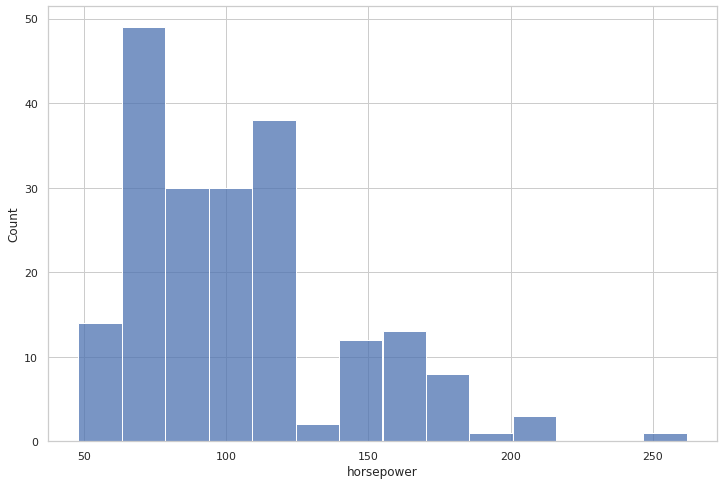

In [88]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.histplot(data=df["horsepower"])
sns.set(font_scale=1)
plt.show()
plt.close()

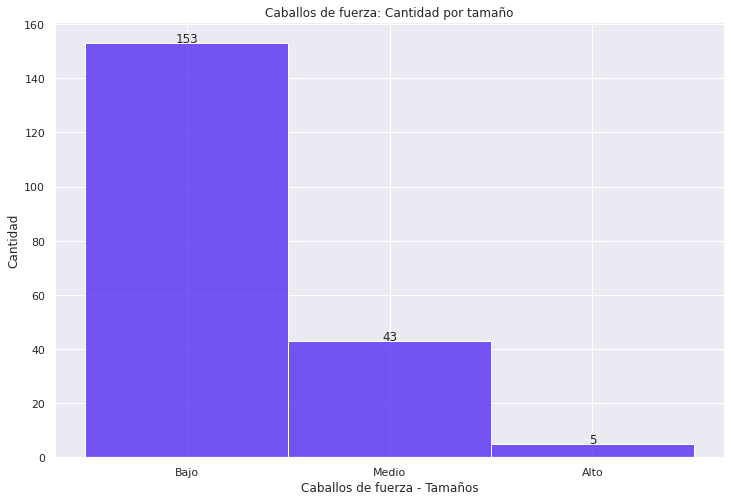

In [89]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
colors = ['#4B22F4','#9C86F9','#0BD4C1']
sns.set_palette(sns.color_palette(colors))
sns.histplot(data=df["horsepower-binned"])

#https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = "center") # sets horizontal alignment (ha) to center

plt.xlabel("Caballos de fuerza - Tamaños")
plt.ylabel("Cantidad")
plt.title("Caballos de fuerza: Cantidad por tamaño")

plt.show()
plt.close()

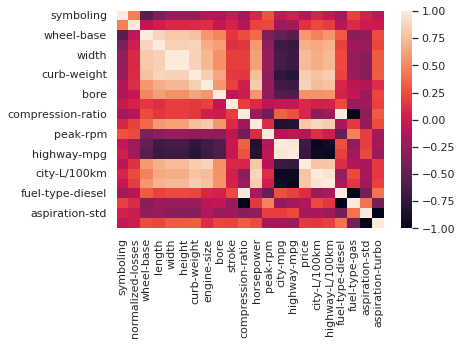

In [90]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
sns.heatmap(correlations, annot=False)
plt.show()
plt.close()

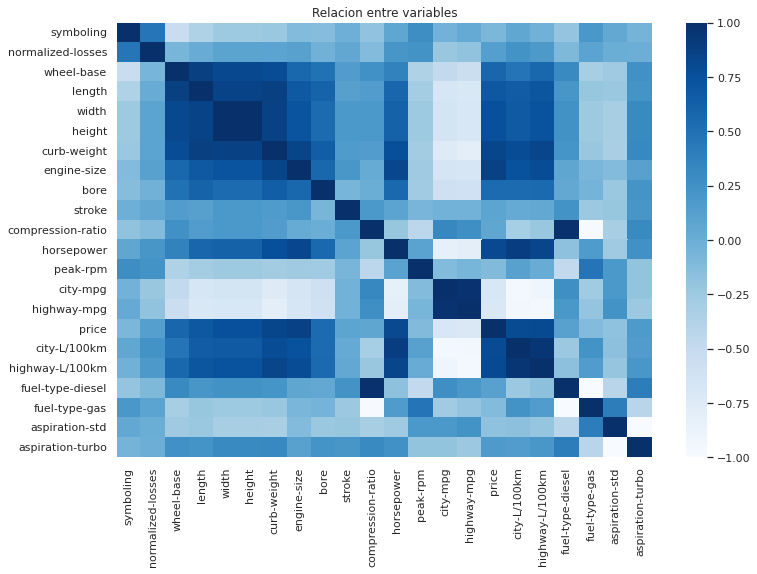

In [91]:
correlations = df.corr() # Ahora ese mismo dataset lo podemos ver de forma mas visual
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
#colors = ["#F0F0F0", "#0BD4C1", "#9C86F9", "#4B22F4","#181B32"]
sns.heatmap(correlations, annot=False, cmap="Blues")

plt.title("Relacion entre variables")

plt.show()
plt.close()

#https://www.python-graph-gallery.com/92-control-color-in-seaborn-heatmaps

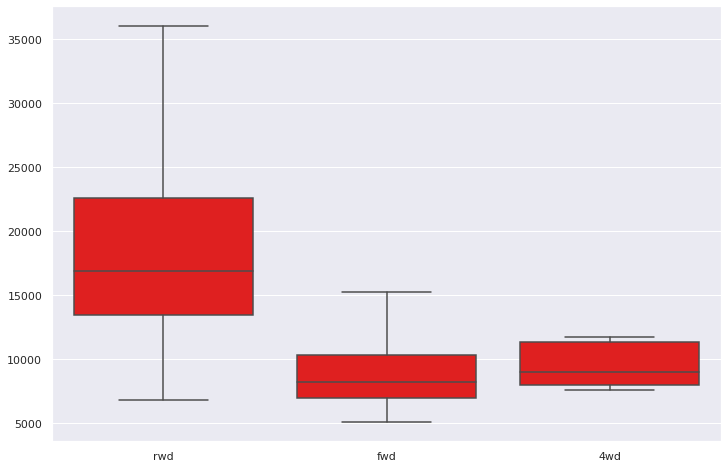

In [92]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")

ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False, color='red')

ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()
plt.close()

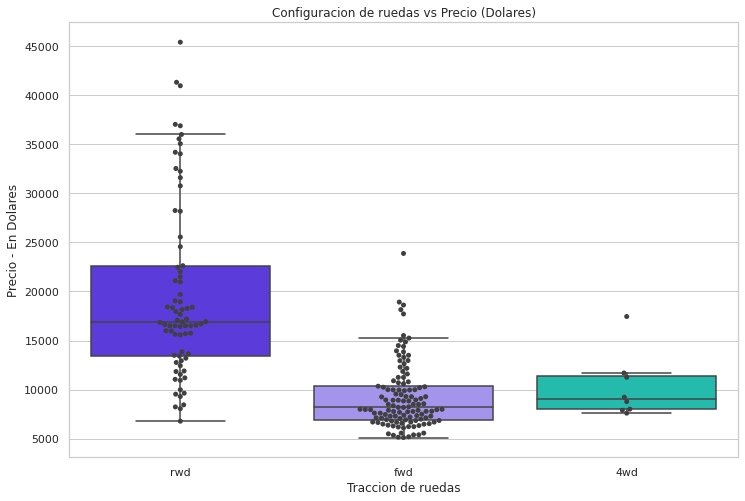

In [93]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")

plt.xlabel("Traccion de ruedas")
plt.ylabel("Precio - En Dolares")
plt.title("Configuracion de ruedas vs Precio (Dolares)")
sns.set(font_scale=1)
plt.show()
plt.close()

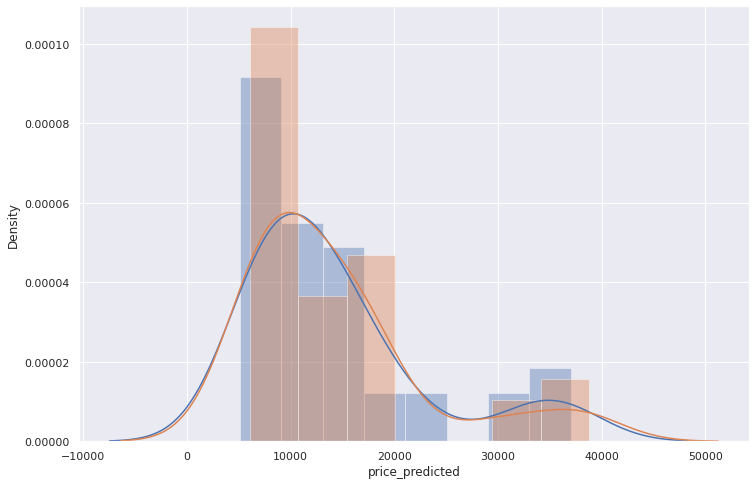

In [94]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"]) # Price
sns.distplot(df_price["price_predicted"]) #Price Predicted

plt.show()
plt.close()

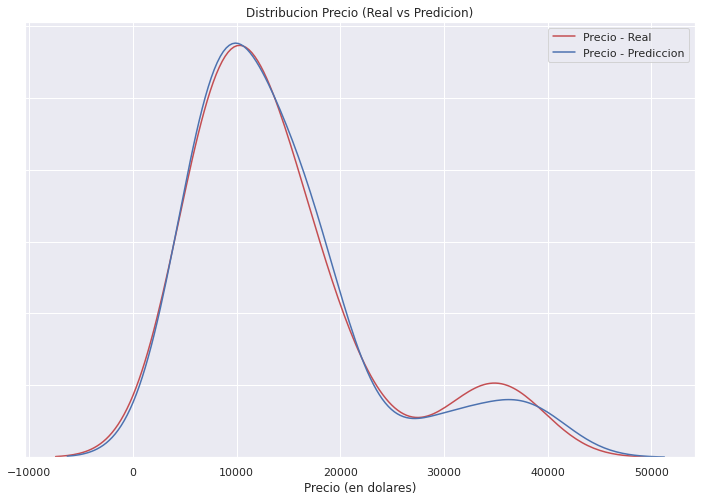

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Distribucion Precio (Real vs Predicion)')
plt.xlabel('Precio (en dolares)')

plt.legend(labels=['Precio - Real', 'Precio - Prediccion'])
plt.show()
plt.close() 
 

## Clase 21: Las mejores visualizaciones y conclusiones de nuestros resultados



1. **¿Como ha sido la distribucion del precio de los automoviles?**

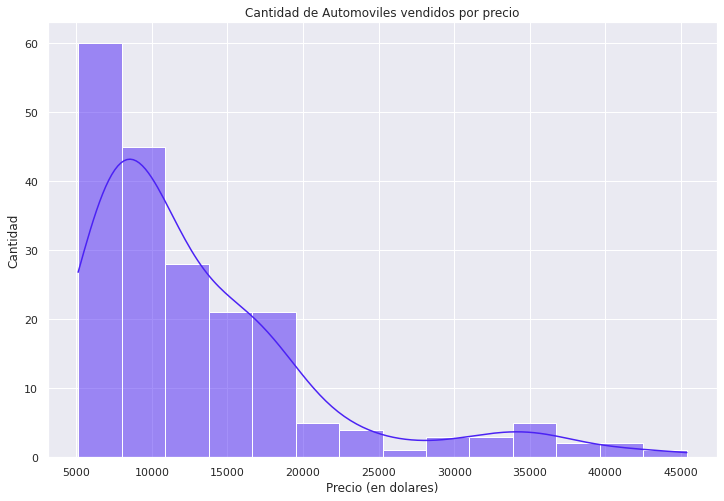

In [96]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 8x8
sns.histplot(df["price"], color='#4B22F4', kde = True) # Tomamos la variable precio, con el color azul de nuestra paleta de colores
plt.xlabel("Precio (en dolares)") # Los ejes siempre es recomendable colocarles titulos
plt.ylabel("Cantidad")
plt.title("Cantidad de Automoviles vendidos por precio") # Un titulo del grafico siempre es importante
plt.show()
plt.close()

El precio de venta de los automoviles se encuentra en un rango entre 5000 y 20000 dolares, donde claramente se ve que entre mas economico es un carro, mayor son la cantidad de ventas de este

2. **¿Existe una relacion de ventas entre el precio y la traccion?**

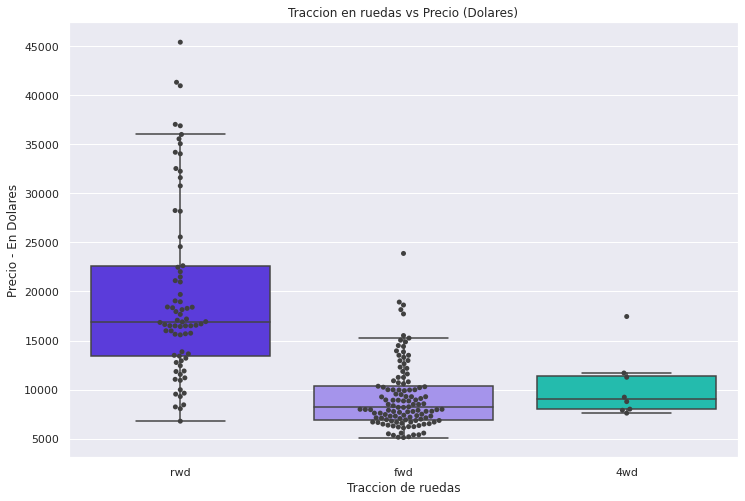

In [97]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))
ax = sns.boxplot(x="drive-wheels", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="drive-wheels", y="price", data=df, color=".25")

plt.xlabel("Traccion de ruedas")
plt.ylabel("Precio - En Dolares")
plt.title("Traccion en ruedas vs Precio (Dolares)")
sns.set(font_scale=1)
plt.show()
plt.close()

In [98]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [99]:
df[df["drive-wheels"]=="4wd"]["price"].describe()

count        8.000000
mean     10241.000000
std       3288.211064
min       7603.000000
25%       7984.250000
50%       9005.500000
75%      11367.750000
max      17450.000000
Name: price, dtype: float64

- Traccion frontal (fwd) tiene mayor cantidad de ventas (118), donde el valor medio se encuentra en 8000 dolares (aproximadamente). La muestra de datos para este grupo tiene dispersion minima
- Traccion trasera (rwd) cuenta con 75 ventas, donde el valor medio se encuentra en 17000 dolares (aproximadamente). La muestra de datos para este grupo tiene dispersion mayor
- Traccion en sus cuatro ruedas (4wd) cuenta con 8 ventas, donde el valor medio se encuentra en 9000

3. **En Caballos de fuerza, ¿Como es su comportamiento en cantidad de automoviles vendidos?**

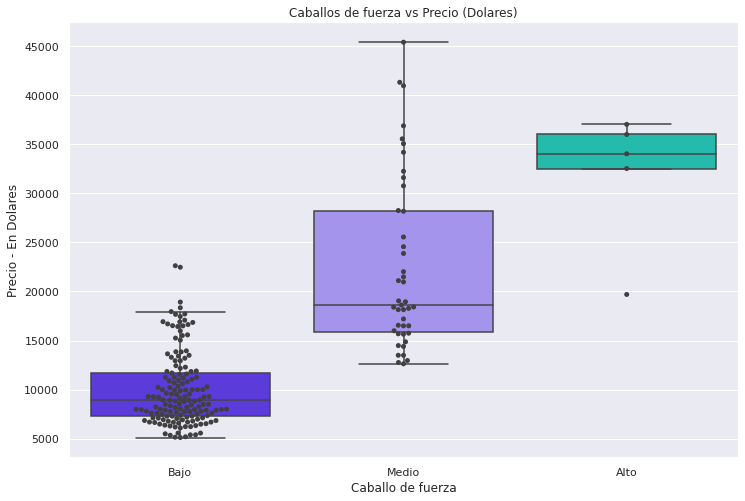

In [100]:
# drive-wheels
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))

ax1 = sns.boxplot(x="horsepower-binned", y="price", data=df, showfliers = False)
ax1 = sns.swarmplot(x="horsepower-binned", y="price", data=df, color=".25")
plt.xlabel("Caballo de fuerza")
plt.ylabel("Precio - En Dolares")
plt.title("Caballos de fuerza vs Precio (Dolares)")

sns.set(font_scale=1)
plt.show()
plt.close()

In [101]:
df["horsepower-binned"].value_counts()

Bajo     153
Medio     43
Alto       5
Name: horsepower-binned, dtype: int64

In [102]:
df[df["horsepower-binned"]=="Bajo"]["price"].describe()

count      153.000000
mean      9989.751634
std       3723.679659
min       5118.000000
25%       7295.000000
50%       8921.000000
75%      11694.000000
max      22625.000000
Name: price, dtype: float64

- Mayor cantidad de ventas para el grupo Bajo (153 ventas), donde el punto medio del precio esta en 8900 dolares (aproximadamente)
- Caballos de fuerza Medio tiene 43 ventas, donde el punto medio esta en 18600 dolares (aproximadamente). La muestra para este grupo es dispera
- Menor ventas para el grupo Alto (5 ventas), en comparacion con los demas grupos

4. **En Ubicacion del Motor, ¿Como es su comportamiento en cantidad de automoviles vendidos?**

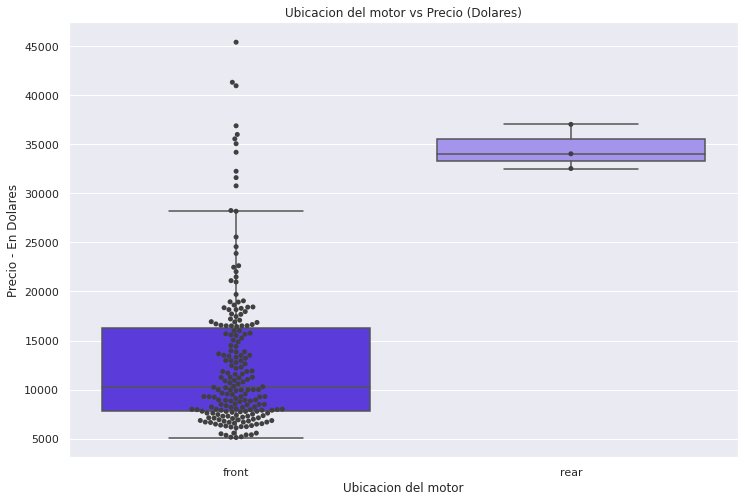

In [103]:
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
sns.set(style="whitegrid")
colors = ["#4B22F4", "#9C86F9", "#0BD4C1"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(x="engine-location", y="price", data=df, showfliers = False)
ax = sns.swarmplot(x="engine-location", y="price", data=df, color=".25")
plt.xlabel("Ubicacion del motor")
plt.ylabel("Precio - En Dolares")
plt.title("Ubicacion del motor vs Precio (Dolares)")
plt.show()
plt.close()

In [104]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [105]:
df[df["engine-location"]=="front"]["price"].describe()

count      198.000000
mean     12884.085859
std       7552.278510
min       5118.000000
25%       7775.000000
50%      10221.500000
75%      16322.000000
max      45400.000000
Name: price, dtype: float64

- La ubicacion frontal habitual es la que mayor se vende, independiente de su precio. Esta localizacion en el dataset conto con 198 ventas y un punto medio de 10 mil dolares (aproximado)

5. **¿Que caracteristicas tienen mayor impacto en las ventas de automoviles?**

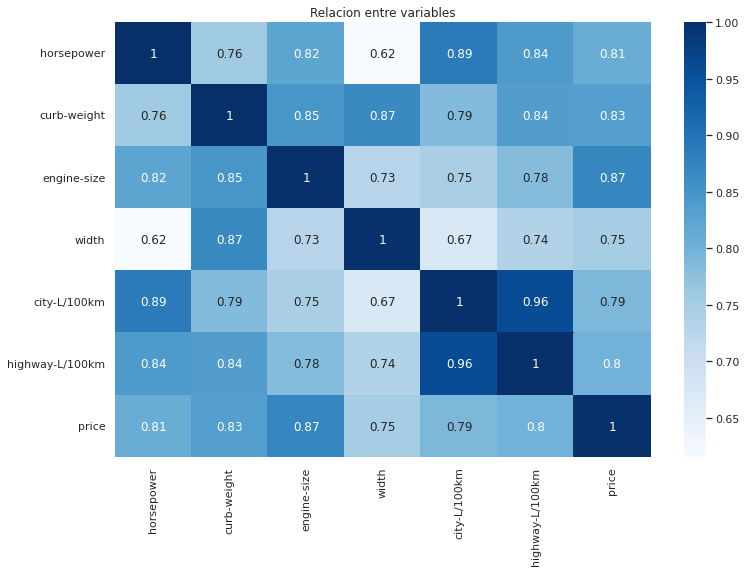

In [106]:
correlations = df[['horsepower', 'curb-weight', 'engine-size','width','city-L/100km','highway-L/100km','price']].corr()
fig, ax = plt.subplots(figsize=(12, 8)) # Tamaño de 12x8
#colors = ["#F0F0F0", "#0BD4C1", "#9C86F9", "#4B22F4","#181B32"]
sns.heatmap(correlations, annot=True, cmap="Blues")
plt.title("Relacion entre variables")
plt.show()
plt.close()

- Se encontraron 6 caracteristicas en nuestro set de datos que cuentan una relacion positiva en el precio del automovil

 - caballos de fuerza
 - peso en el vacio
 - tamaño del motor
 - peso
 - rendimiento en ciudad (L/100 km)
 - rendimiento en autopista (L/100 km)


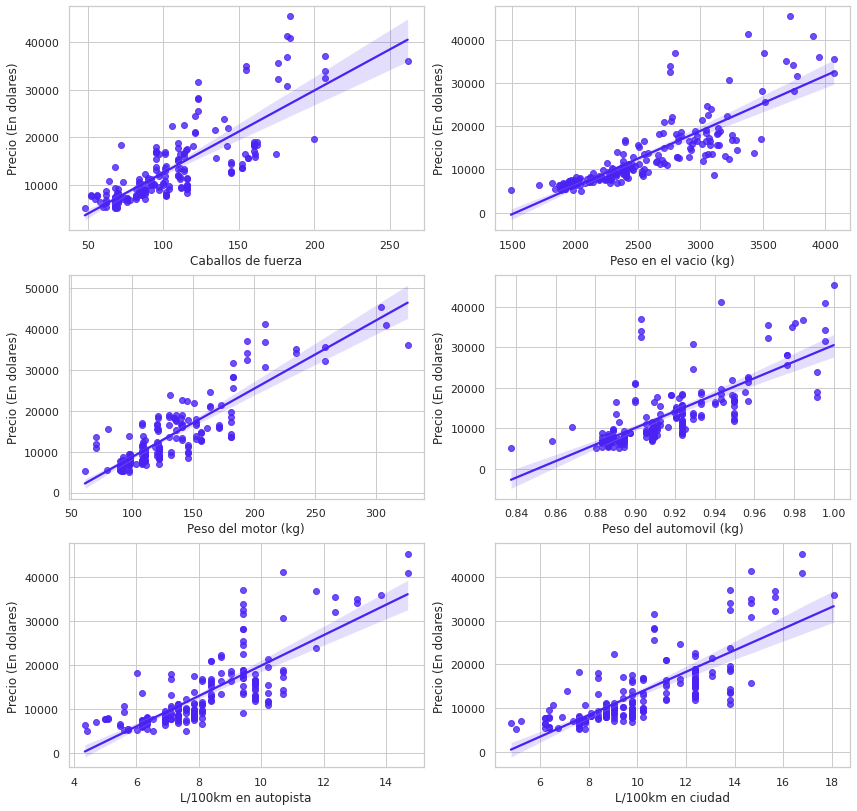

In [107]:
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

sns.regplot(ax = axes[0, 0], x="horsepower", y="price", data=df)
axes[0,0].set_xlabel("Caballos de fuerza")
axes[0,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[0, 1], x="curb-weight", y="price", data=df)
axes[0,1].set_xlabel("Peso en el vacio (kg)")
axes[0,1].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[1, 0], x="engine-size", y="price", data=df)
axes[1,0].set_xlabel("Peso del motor (kg)")
axes[1,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[1, 1], x="width", y="price", data=df)
axes[1,1].set_xlabel("Peso del automovil (kg)")
axes[1,1].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[2, 0], x="highway-L/100km", y="price", data=df)
axes[2,0].set_xlabel("L/100km en autopista")
axes[2,0].set_ylabel("Precio (En dolares)")
sns.regplot(ax = axes[2, 1], x="city-L/100km", y="price", data=df)
axes[2,1].set_xlabel("L/100km en ciudad")
axes[2,1].set_ylabel("Precio (En dolares)")

plt.show()
plt.close()

- Para las variables mencionadas se ve que a mayor incremento en sus valores, el precio sube proporcionalmente
- La distribucion de los datos tienden a tener el mismo comportamiento de la recta, y el margen de error (linea sombreada) no es tan significativa


6. **¿Que accionable se puede crear con estas variables?**

- Se realizo la construccion de 2 modelos predictivos para predecir el precio en funcion de estas variables

- El resultado fue el siguiente:
    - Modelo Regresion Multiple: Score del 77%
    - Modelo Bosques Aleatorios: Score del 90%

- Con base en estos resultados, se procede a usar el metodo de Bosques Aleatorios como algoritmo de prediccion, arrojando el siguiente resultado:

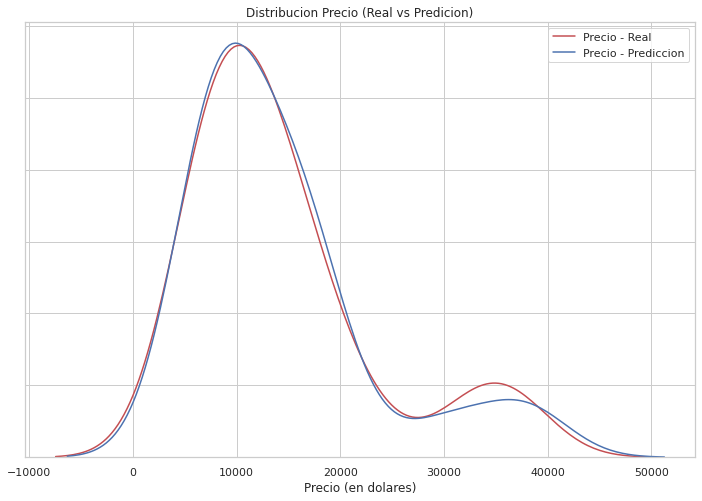

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.distplot(df_price["price"], hist=False, color="r")
sns.distplot(df_price["price_predicted"], hist=False, color="b", ax=ax)

ax.set(yticklabels=[])  # remove the tick labels
ax.tick_params(left=False)  # remove the ticks
ax.set(ylabel=None)
plt.legend(labels=['Price', 'Predict - Testing'])

plt.title('Distribucion Precio (Real vs Predicion)')
plt.xlabel('Precio (en dolares)')

plt.legend(labels=['Precio - Real', 'Precio - Prediccion'])
plt.show()
plt.close() 

- Con las variables "caballos de fuerza", "peso en vacio", "peso del motor", "rendimiento en autopista" y "rendimiento en ciudad" se ve que la prediccion tiene un comportamiento casi similar al comportamiento real.

- El score alcanzado del 90% quiere decir que de para todo valor nuevo ingresado en el set de datos, este modelo lo predecira bien en un 90%

Lectura de datos de para mi grafico

In [111]:
data = pd.read_table(file_path, delimiter = ",", names = headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [112]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [113]:
data["price"].describe()

count     205
unique    187
top         ?
freq        4
Name: price, dtype: object

In [114]:
data.tail(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [115]:
data["make"].value_counts

<bound method IndexOpsMixin.value_counts of 0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: make, Length: 205, dtype: object>